In [1]:
from fastai.vision.all import *

In [2]:
# Download data
path = untar_data(URLs.CIFAR)

In [3]:
# Create data pipeline
tfms = aug_transforms(do_flip=False)
data = ImageDataLoaders.from_folder(path, valid='test', ds_tfms=tfms, size=128, num_workers=0)

In [4]:
# Define model
learn = cnn_learner(data, resnet18, metrics=accuracy)

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=6.309573450380412e-07)

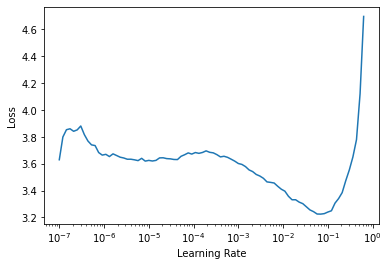

In [5]:
# Find learning rate
learn.lr_find()

In [6]:
# Training
learn.fit_one_cycle(3, lr_max=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.430583,1.200820,0.575800,01:26
1,1.056518,0.948429,0.662700,01:05
2,0.975149,0.918598,0.674900,01:05


In [7]:
# Fine tuning
learn.unfreeze()

In [8]:
learn.fit_one_cycle(3, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.907736,0.861480,0.695700,01:13
1,0.836183,0.812088,0.716200,01:13
2,0.828145,0.801856,0.718800,01:12


In [9]:
# Test Time Augmentation
preds,targs = learn.tta()

In [10]:
accuracy(preds, targs).item()

0.7188000082969666